<p style="font-family:verdana;font-size:200%;text-align:center;">아파트가격 데이터 분석</p>

### 부제 : Python을 활용한 아파트가격 결정모형

### 이번 시간 강의 내용

1. 실습 데이터셋 준비 : **requests**, **chardet** & **pandas** 라이브러리
1. 탐색적 데이터 분석
1. 데이터 시각화 : **seaborn** & **matplotlib** 라이브러리
1. 회귀모형 적합 : **statsmodels** & **sklearn** 라이브러리

### 강의자료 준비

* 작업경로로 사용할 폴더를 생성합니다.
 - 문서(Documents) 폴더에 **BC_Korea**라는 폴더를 생성합니다.
 - Windows : 'C:/Users/User_name/Documents/BC_Korea'
 - MacOS : '/Users/User_name/Documents/BC_Korea'


* 이번 강의에 사용될 [코드 및 데이터](https://codeload.github.com/MrKevinNa/BC_Korea/zip/refs/heads/main)를 압축파일로 내려받습니다.
 - 일반적으로 압축파일은 다운로드(Downloads) 폴더에 저장되어 있습니다.
 - 압축파일에는 **code** 및 **data** 폴더가 포함되어 있습니다.
 - 압축파일을 풀고 **code** 및 **data** 폴더를 작업경로인 **BC_Korea** 폴더로 옮깁니다.


* [서울 강남 아파트가격 데이터](http://bit.ly/Gangnam_APT_Price_2020_txt)를 읽고 데이터프레임으로 생성합니다.
 - price : 거래금액 (단위: 억원)
 - date : 거래일자
 - aptName : 아파트단지명
 - dongName : 법정동
 - householdCnt : 아파트단지 세대수
 - floorAreaRate : 아파트단지 용적률
 - parkingLotCnt : 아파트단지 주차대수
 - exclusiveArea : 전용면적
 - floor : 층

-> 보통 통계학과에서는 개별에 관한 것 / 전체 단지에 관한 것을 따로 구분해서 한다. 

### 실습 데이터셋 준비 : requests, chardet & pandas 라이브러리  
- chardet : 문자열 종류를 알려준다. string : 우리가 읽을 수 있게 디코드 된 상태, bytes : 인코딩 된 상태. 우리가 읽을 수 없음

In [67]:
# 라이브러리를 호출합니다.
import requests, chardet
import numpy as np
import pandas as pd

In [68]:
# 실습 데이터셋이 저장된 URL을 지정합니다.
url = 'http://bit.ly/Gangnam_APT_Price_2020_txt'

In [69]:
# HTTP 요청을 실행합니다.
res = requests.get(url = url)

- Content-length가 길수록 큰 데이터를 가져온 것  
- charset : 웹 상에 올라간 상태를 확인 (인코딩 상태와 다를 수 있다.)  

In [70]:
# HTTP 응답 헤더를 확인합니다. 
# 'Content-Length'와 'Content-Type' 위주로 내용을 확인합니다.
res.headers

{'Connection': 'keep-alive', 'Content-Length': '54853', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"522f51acbc47d95f3e9e8d7f163795166cb05e6cf3ce5b37d598839fb822752d"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': 'B3D4:4898:1215FD:168B66:60EF8000', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Thu, 15 Jul 2021 02:59:14 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-itm18848-ITM', 'X-Cache': 'HIT', 'X-Cache-Hits': '1', 'X-Timer': 'S1626317955.565550,VS0,VE1', 'Vary': 'Authorization,Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'X-Fastly-Request-ID': '6f26695f60d333101b41d0a814b79fd53f006535', 'Expires': 'Thu, 15 Jul 2021 03:04:14 GMT', 'Source-Age': '115'}

In [71]:
# HTTP 응답 상태코드를 확인합니다.
# 200이면 정상입니다.
res.status_code

200

In [72]:
# HTTP 응답에 포함된 Body(텍스트)의 일부를 문자열(str)로 출력합니다.
# 구분자가 세미콜론인 것을 알 수 있습니다.
res.text[:200]

'"price";"date";"aptName";"dongName";"householdCnt";"floorAreaRate";"parkingLotCnt";"exclusiveArea";"floor"\n"1";24.7;"2020-01-02";"포스코더샵";"대치동";276;299;655;139.54;3\n"2";30;"2020-01-02";"대치아이파크";"대치동";7'

In [73]:
# HTTP 응답에 포함된 Body(텍스트)의 일부를 바이너리(bytes)로 출력합니다.
res.content[:200]

b'"price";"date";"aptName";"dongName";"householdCnt";"floorAreaRate";"parkingLotCnt";"exclusiveArea";"floor"\n"1";24.7;"2020-01-02";"\xed\x8f\xac\xec\x8a\xa4\xec\xbd\x94\xeb\x8d\x94\xec\x83\xb5";"\xeb\x8c\x80\xec\xb9\x98\xeb\x8f\x99";276;299;655;139.54;3\n"2";30;"2020-01-02";'

In [74]:
# 바이너리의 인코딩 방식을 확인합니다.
# 인코딩은 utf-8, 신뢰도가 99%
chardet.detect(res.content[:200])

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [75]:
# 텍스트 파일을 읽고, 데이터프레임 df를 생성합니다.
# 구분자(separator)가 세미콜론(;)이므로 추가해야 합니다. (기본값 : ',')
# 인코딩 방식은 'UTF-8'이므로 추가할 필요 없습니다. 
# 만약 인코딩 방식이 'EUC-KR'이면 encoding = 'EUC-KR'를 추가해야 합니다.
df = pd.read_csv(filepath_or_buffer = url, sep = ';')

In [76]:
# df의 일부를 출력합니다. n 매개변수에 전달되는 인자의 기본값은 5입니다.
df.head(n = 10)

,price,date,aptName,dongName,householdCnt,floorAreaRate,parkingLotCnt,exclusiveArea,floor
1,24.70,2020-01-02,포스코더샵,대치동,276,299,655,139.540,3
2,30.00,2020-01-02,대치아이파크,대치동,768,274,1171,114.970,10
3,17.00,2020-01-02,우성캐릭터199,도곡동,199,620,902,132.940,5
4,20.00,2020-01-02,아카데미스위트,도곡동,414,996,808,164.870,7
5,7.70,2020-01-03,현대하이츠,역삼동,12,287,15,99.220,4
6,2.02,2020-01-03,우림루미아트,역삼동,84,522,64,24.000,8
7,22.45,2020-01-03,삼성힐스테이트2단지,삼성동,926,273,1291,84.679,5
8,21.00,2020-01-03,미성2차,압구정동,911,0,1093,74.400,13
9,12.00,2020-01-03,푸른마을,일원동,930,249,930,59.760,7
10,8.70,2020-01-03,까치마을,수서동,1404,208,1410,39.600,13


데이터를 먼저 열었으면 info 부터 확인하는 것이 좋다.  
컬럼별로 자료형이 일치하는지 확인하는 것도 중요하다.  
    예 ) price가 float64인건 괜찮지만, date가 object인 것은 조금 좋지 않다

In [77]:
# df의 정보를 확인합니다.
# 행 길이, 열 길이, 열별 결측값 아닌 개수 및 자료형(data type)을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3741 entries, 1 to 3741
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3741 non-null   float64
 1   date           3741 non-null   object 
 2   aptName        3741 non-null   object 
 3   dongName       3741 non-null   object 
 4   householdCnt   3741 non-null   int64  
 5   floorAreaRate  3741 non-null   int64  
 6   parkingLotCnt  3741 non-null   int64  
 7   exclusiveArea  3741 non-null   float64
 8   floor          3741 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 292.3+ KB


In [78]:
# 열이름을 한글로 변경합니다.
df.columns = ['거래금액', '거래일자', '아파트명', '법정동명', '세대수', '용적률', '주차대수', '전용면적', '층']

데이터를 변환시키는 세가지 방법  
* 시리즈.astype() 해서 재할당해주기.  
    단, datetime64의 경우 스트링만 가지고 바꿀 수 있어서 밑에서는 str로 먼저 하고 난뒤에 바꾼 것
* 데이터프레임.astype({'컬럼명':'str','컬럼명2':'int'})  
    데이터 프레임의 모든 컬럼을 하나씩 다른 타입으로 바꿀 때  
* 데이터프레임[[컬럼명]].astype('str')  
    컬럼명을 일부 / 혹은 데이터프레임 전체를 특정한 걸로 바꿀 때

In [79]:
# 거래일자를 날짜형으로 변환합니다.
df['거래일자'] = df['거래일자'].astype('str').astype('datetime64')

날짜형으로 바꾸게 되면,  
년 / 월 / 시 / 분 / 초 등 각각으로 파싱(추출)이 가능하게된다.  

datetime64는 4가지 타입만 가능하다  
* yyyy-mm-dd    
* yyyy/mm/dd  
* yyyy.mm.dd  
* yyyy mm dd  

이게 안될 때는 pd.to_datetime()으로 이용하기

In [80]:
# 참고
dates = pd.Series(data = ['2021.1.12'])
dates.astype('datetime64')
dates = dates.str.split('.',expand=True)
dates[1] = dates[1].str.zfill(2)
','.join(dates.iloc[0])

'2021,01,12'

In [81]:
# df의 열별 자료형을 확인합니다.
df.dtypes

거래금액           float64
거래일자    datetime64[ns]
아파트명            object
법정동명            object
세대수              int64
용적률              int64
주차대수             int64
전용면적           float64
층                int64
dtype: object

In [82]:
# 거래일자별 빈도수를 확인합니다.
df['거래일자'].value_counts().sort_index().reset_index()

,index,거래일자
0,2020-01-02,4
1,2020-01-03,6
2,2020-01-04,9
3,2020-01-06,9
4,2020-01-07,3
...,...,...
338,2020-12-27,3
339,2020-12-28,14
340,2020-12-29,14
341,2020-12-30,22


```
dir(df['거래일자'])
```
를 하면 변수와 메소드 리스트를 반환해준다.

In [83]:
# 거래일자에서 요일을 추출합니다.
df['요일정수'] = df['거래일자'].dt.dayofweek.astype('str')
df['요일'] = df['거래일자'].dt.day_name()

In [84]:
# df의 일부를 출력합니다.
df.head()

,거래금액,거래일자,아파트명,법정동명,세대수,용적률,주차대수,전용면적,층,요일정수,요일
1,24.7,2020-01-02,포스코더샵,대치동,276,299,655,139.54,3,3,Thursday
2,30.0,2020-01-02,대치아이파크,대치동,768,274,1171,114.97,10,3,Thursday
3,17.0,2020-01-02,우성캐릭터199,도곡동,199,620,902,132.94,5,3,Thursday
4,20.0,2020-01-02,아카데미스위트,도곡동,414,996,808,164.87,7,3,Thursday
5,7.7,2020-01-03,현대하이츠,역삼동,12,287,15,99.22,4,4,Friday


- 거래요일이 영문으로 생성되었습니다. 
- 이는 로케일 문제이므로 한글 로케일로 변경하고 변수를 다시 생성해야 합니다.

In [85]:
# 라이브러리를 호출합니다.
import locale

In [86]:
# 현재 설정된 날짜/시간 로케일을 확인합니다.
locale.getlocale(category = locale.LC_TIME)

('ko_KR', 'eucKR')

In [87]:
# 날짜/시간 로케일을 '한국'으로 변경합니다.
# MacOS는 'ko_KR', Windows는 'korean'으로 지정하세요. 윈도우즈도 됨.
locale.setlocale(category = locale.LC_TIME, locale = 'ko_KR')

'ko_KR'

In [88]:
# 거래일자에서 한글 요일을 추출합니다. '%A'는 '요일'에 해당하는 포맷입니다.
df['요일'] = df['거래일자'].dt.strftime('%A')

In [89]:
# 데이터프레임의 일부를 출력합니다.
df.head()

,거래금액,거래일자,아파트명,법정동명,세대수,용적률,주차대수,전용면적,층,요일정수,요일
1,24.7,2020-01-02,포스코더샵,대치동,276,299,655,139.54,3,3,목요일
2,30.0,2020-01-02,대치아이파크,대치동,768,274,1171,114.97,10,3,목요일
3,17.0,2020-01-02,우성캐릭터199,도곡동,199,620,902,132.94,5,3,목요일
4,20.0,2020-01-02,아카데미스위트,도곡동,414,996,808,164.87,7,3,목요일
5,7.7,2020-01-03,현대하이츠,역삼동,12,287,15,99.22,4,4,금요일


In [90]:
# 요일정수와 요일을 하나의 문자열로 결합하고, 요일정수를 삭제합니다.
cols = ['요일정수', '요일']
df['요일'] = df[cols].apply(lambda x: '-'.join(x), axis = 1)
df = df.drop(labels = ['요일정수'], axis = 1)

In [91]:
# 데이터프레임의 일부를 출력합니다.
df.head()

,거래금액,거래일자,아파트명,법정동명,세대수,용적률,주차대수,전용면적,층,요일
1,24.7,2020-01-02,포스코더샵,대치동,276,299,655,139.54,3,3-목요일
2,30.0,2020-01-02,대치아이파크,대치동,768,274,1171,114.97,10,3-목요일
3,17.0,2020-01-02,우성캐릭터199,도곡동,199,620,902,132.94,5,3-목요일
4,20.0,2020-01-02,아카데미스위트,도곡동,414,996,808,164.87,7,3-목요일
5,7.7,2020-01-03,현대하이츠,역삼동,12,287,15,99.22,4,4-금요일


In [92]:
# 세대당 주차대수 변수를 생성합니다.
# 반올림하여 소수점 둘째자리까지 남깁니다.
df['세대주차'] = (df['주차대수'] / df['세대수']).round(2)

In [93]:
# 데이터프레임의 일부를 출력합니다.
df.head()

,거래금액,거래일자,아파트명,법정동명,세대수,용적률,주차대수,전용면적,층,요일,세대주차
1,24.7,2020-01-02,포스코더샵,대치동,276,299,655,139.54,3,3-목요일,2.37
2,30.0,2020-01-02,대치아이파크,대치동,768,274,1171,114.97,10,3-목요일,1.52
3,17.0,2020-01-02,우성캐릭터199,도곡동,199,620,902,132.94,5,3-목요일,4.53
4,20.0,2020-01-02,아카데미스위트,도곡동,414,996,808,164.87,7,3-목요일,1.95
5,7.7,2020-01-03,현대하이츠,역삼동,12,287,15,99.22,4,4-금요일,1.25


### 탐색적 데이터 분석

- 숫자형 변수와 문자형 변수의 기술통계량 확인
- 숫자형 입력변수와 목표변수(거래금액)의 상관관계 확인
- 숫자형 입력변수간 상관관계 확인 : 다중공선성 입력변수 탐색

데이터가 정규분포하는지, 선형인지 확인도 해야한다. 그냥 단순 회귀돌리려는데 선형이 아니면 다른 모델을 써야 함  
유의확률이 0.05보다 작은 것을 남겨라 

* 최소값과 최대값을 잘 볼 것   
    : 우리가 다룰 데이터에서 이런 데이터가 나올 수 있는가?를 생각해야 한다. 또한 가운데가 벌어졌나?  
* 평균은 이상치의 영향을 많이 받고, 중위값은 덜 로버스트 하기 때문에 두개가 차이가 나면 이유에 대해서 생각해봐야 한다.  


In [94]:
# 지수표현식으로 출력되지 않도록 하는 설정합니다.
# [참고] 모든 실수가 소수점 넷째 자리까지 출력되므로 불편할 수 있습니다.
# pd.options.display.float_format = '{:.4f}'.format

# 숫자형 변수(열)의 기술통계량을 확인합니다.
df.describe()

,거래금액,세대수,용적률,주차대수,전용면적,층,세대주차
count,3741.000000,3741.000000,3741.000000,3741.000000,3741.000000,3741.000000,3741.000000
mean,18.052064,825.819300,269.538626,958.029671,86.675928,9.233627,1.245966
std,9.577705,860.027223,221.384768,1008.667524,42.703413,7.341258,0.662421
min,1.700000,8.000000,0.000000,0.000000,12.100000,-1.000000,0.000000
25%,10.925000,247.000000,174.000000,217.000000,59.606000,4.000000,0.870000
50%,17.000000,713.000000,224.000000,700.000000,84.236000,8.000000,1.120000
75%,23.500000,960.000000,282.000000,1148.000000,108.150000,12.000000,1.500000
max,67.000000,4424.000000,1102.000000,4443.000000,273.680000,67.000000,6.080000


In [95]:
# 문자형 변수(열)의 기술통계량을 확인합니다.
df.describe(include = 'object')

,아파트명,법정동명,요일
count,3741,3741,3741
unique,405,13,7
top,LH강남아이파크,개포동,5-토요일
freq,160,561,790


#### 피어슨 상관분석
정규분포 할 때, 하지 않을 때 등 다양한 상관분석 존재

In [96]:
# 라이브러리를 호출합니다.
from scipy import stats

In [97]:
# 입력변수명을 리스트로 생성합니다.
cols = ['세대수', '용적률', '주차대수', '전용면적', '층', '세대주차']

In [98]:
stats.pearsonr(x = df['세대수'],y=df['거래금액'])

(0.16583867804469096, 1.7758296839214216e-24)

In [99]:
# 입력변수와 목표변수의 피어슨 상관분석 결과를 데이터프레임으로 생성합니다.
# apply() 함수를 이용하여 입력변수별로 반복 실행합니다.
corr = df[cols].apply(lambda x: stats.pearsonr(x = x, y = df['거래금액']), axis = 0).round(4)

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
# corr을 출력합니다.
corr

In [ ]:
# corr의 행이름을 변경합니다.
corr.index = ['상관계수', '유의확률']

In [ ]:
# corr을 다시 출력합니다.
corr

In [ ]:
# 숫자형 입력변수간 피어슨 상관계수 행렬 출력합니다. (다중공선성 입력변수 탐색)
# 주대각원소는 자기 자신과의 상관계수이므로 1이 됩니다.
df[cols].corr()

In [ ]:
# 상관계수가 0.8 이상인 관계가 있는지 확인합니다.
# True에 해당하는 입력변수는 '세대수와 주차대수'입니다.
df[cols].corr() >= 0.8

### 데이터 시각화 : seaborn & matplotlib 라이브러리

### 그래프 옵션 및 폰트 설정

In [100]:
# 라이브러리를 호출합니다.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [101]:
# 그래프의 크기와 해상도를 설정합니다.
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 100

#### 구글 폰트에 등록된 한글 폰트를 설치하는 방법을 소개합니다.

- [구글 폰트](https://fonts.google.com/?subset=korean)에서 원하는 한글 폰트를 선택합니다.
- 한글 폰트를 압축파일을 내려받습니다.
- 다운로드 폴더로 이동하여 압출파일을 풀면 **ttf(true type font)** 파일이 포함되어 있습니다.
- **ttf** 파일에서 마우스 오른쪽 버튼을 클릭하고, **설치** 메뉴를 선택하면 폰트가 설치됩니다.

In [102]:
# 사용 중인 컴퓨터에 설치된 폰트 목록을 생성합니다.
fontList = fm.findSystemFonts(fontext = 'ttf')

In [103]:
# 설치된 폰트 개수를 확인합니다.
len(fontList)

1147

In [104]:
# 폰트 목록의 일부를 출력합니다.
fontList[0:10]

['C:\\Windows\\Fonts\\OLDENGL.TTF',
 'C:\\WINDOWS\\Fonts\\snaps_BlackFit66.ttf',
 'C:\\WINDOWS\\Fonts\\snaps_Lovelt-Bold.ttf',
 'C:\\WINDOWS\\Fonts\\webdings.ttf',
 'C:\\Windows\\Fonts\\Typo_SsangmunDongB.ttf',
 'C:\\WINDOWS\\Fonts\\snaps_YMjO100-Bold.ttf',
 'C:\\Windows\\Fonts\\COPRGTL.TTF',
 'C:\\Windows\\Fonts\\sylfaen.ttf',
 'C:\\WINDOWS\\Fonts\\HMFMOLD.TTF',
 'C:\\WINDOWS\\Fonts\\snaps_BlackFit_1.ttf']

In [105]:
# 원하는 한글 폰트명으로 폰트 경로를 찾습니다.
fontPath = [font for font in fontList if 'snaps_YMjO100_1' in font]

In [106]:
# 한글 폰트 경로를 출력하고, 원하는 것을 선택합니다.
for i, e in enumerate(fontPath):
    print(i, e)

0 C:\Windows\Fonts\snaps_YMjO100_1.ttf
1 C:\WINDOWS\Fonts\snaps_YMjO100_1.ttf


In [107]:
# 한글 폰트 정보를 생성합니다.
fontProp = fm.FontProperties(fname = fontPath[0])

In [108]:
# 한글 폰트와 글자 크기를 설정합니다.
plt.rcParams['font.family'] = fontProp.get_name()
plt.rcParams['font.size'] = 12

#### 목표변수의 분포 확인

In [109]:
# 목표변수의 최소값과 최대값을 확인합니다.
df['거래금액'].describe()[['min', 'max']]

min     1.7
max    67.0
Name: 거래금액, dtype: float64

In [110]:
# 히스토그램의 계급(경계)을 설정합니다.
# 히스토그램의 계급은 최소값보다 작은 숫자로 시작하고, 최대값보다 큰 숫자로 끝나야 합니다.
bins = np.arange(0, 68, 1)

C:\Users\Sum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


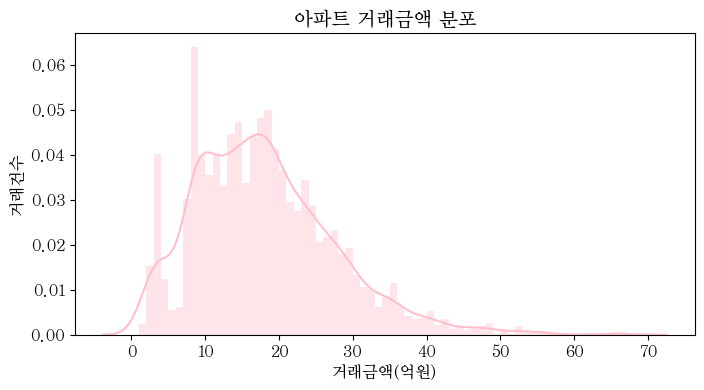

In [111]:
# 히스토그램을 그립니다.
sns.distplot(df['거래금액'], bins = bins,hist=True, color = 'pink')
plt.title(label = '아파트 거래금액 분포')
plt.xlabel(xlabel = '거래금액(억원)')
plt.ylabel(ylabel = '거래건수');

#### 입력변수와 목표변수의 선형관계 확인 (산점도 & 회귀직선)

In [112]:
# 산점도와 회귀직선을 시각화하는 함수를 정의합니다.
# 매개변수로 data(데이터프레임), x(입력변수명) 및 y(목표변수명)을 설정합니다.
def drawScatter(data, x, y):
    sns.regplot(data = data, x = x, y = y, color = 'black')
    sns.scatterplot(data = data, x = x, y = y, color = 'darkred', alpha = 0.5)
    plt.title(label = f'{x} 및 {y}의 관계');

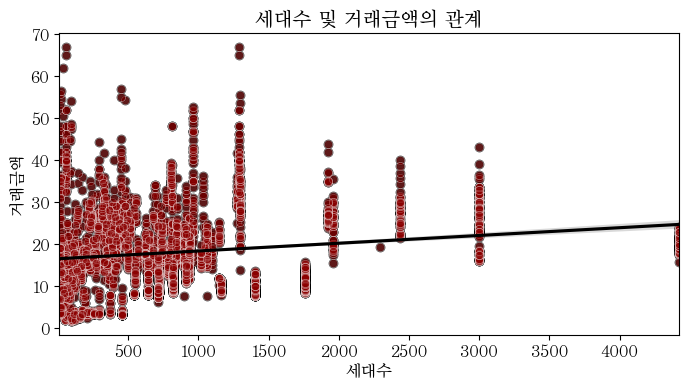

In [113]:
# 세대수와 거래금액의 선형관계를 확인합니다.
drawScatter(data = df, x = '세대수', y = '거래금액')

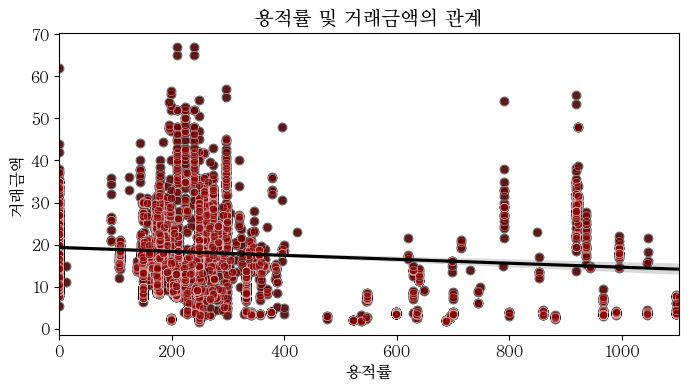

In [114]:
# 용적률과 거래금액의 선형관계를 확인합니다.
drawScatter(data = df, x = '용적률', y = '거래금액')

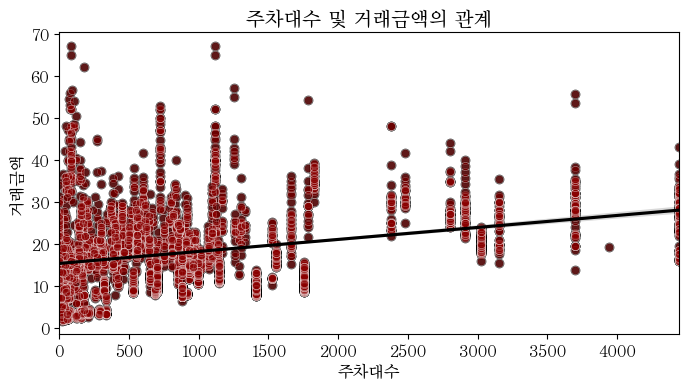

In [115]:
# 주차대수와 거래금액의 선형관계를 확인합니다.
drawScatter(data = df, x = '주차대수', y = '거래금액')

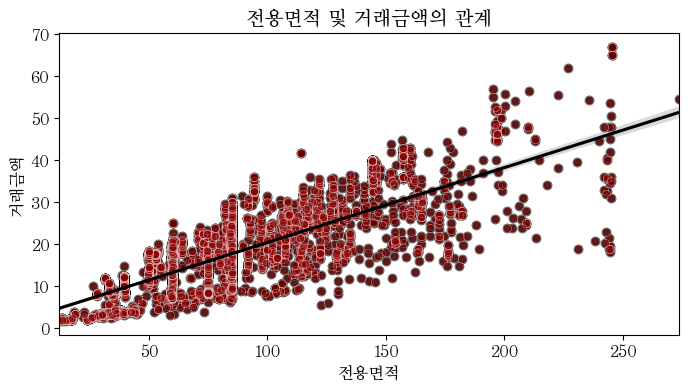

In [116]:
# 전용면적과 거래금액의 선형관계를 확인합니다.
drawScatter(data = df, x = '전용면적', y = '거래금액')

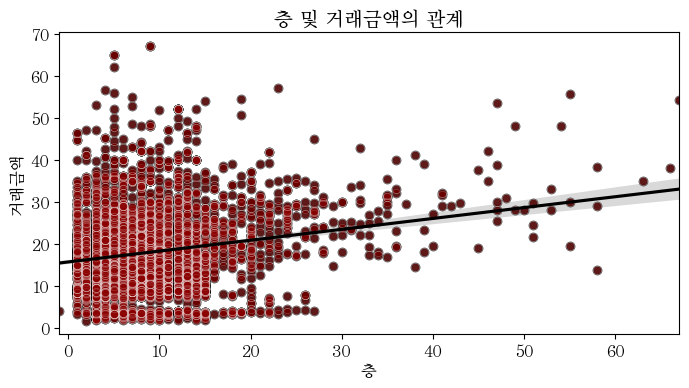

In [117]:
# 층과 거래금액의 선형관계를 확인합니다.
drawScatter(data = df, x = '층', y = '거래금액')

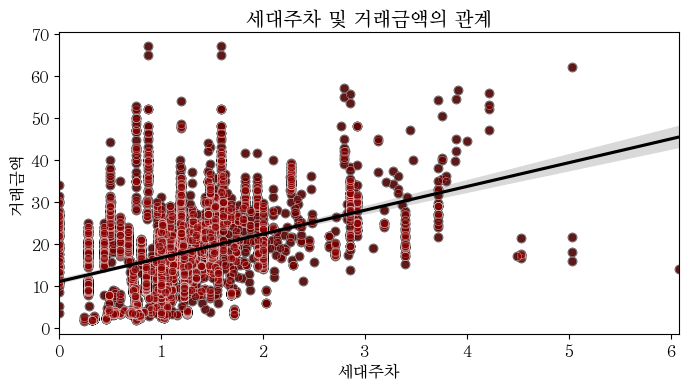

In [118]:
# 세대주차와 거래금액의 선형관계를 확인합니다.
drawScatter(data = df, x = '세대주차', y = '거래금액')

In [119]:
# 요일별 거래금액의 평균을 계산합니다.
weekdayMeanPrice = df.groupby('요일').mean()[['거래금액']].sort_index().reset_index()

In [120]:
# weekdayMeanPrice를 출력합니다.
weekdayMeanPrice

,요일,거래금액
0,0-월요일,18.432024
1,1-화요일,18.261726
2,2-수요일,18.347670
3,3-목요일,19.631846
4,4-금요일,16.187685
5,5-토요일,17.636766
6,6-일요일,18.040728


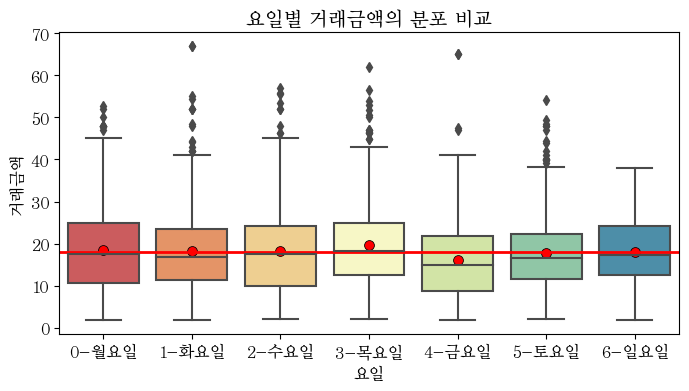

In [121]:
# 상자수염그림으로 요일별 거래금액의 분포를 비교합니다.
sns.boxplot(data = df, x = '요일', y = '거래금액', 
            order = weekdayMeanPrice['요일'], palette = 'Spectral')
sns.scatterplot(data = weekdayMeanPrice, x = '요일', y = '거래금액', 
                color = 'red', edgecolor = 'black', s = 50)
plt.axhline(y = df['거래금액'].mean(), color = 'red', linewidth = 2)
plt.title(label = '요일별 거래금액의 분포 비교');

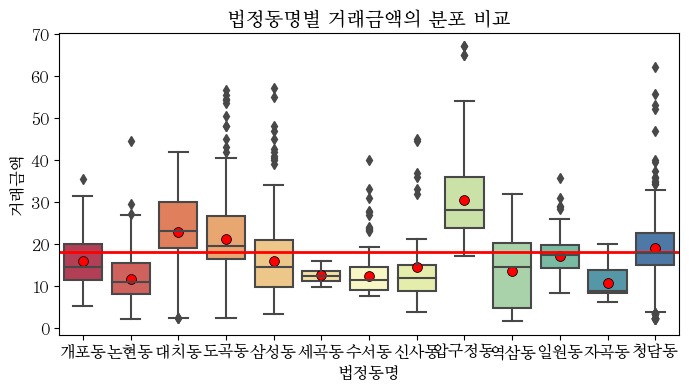

In [122]:
dongMeanPrice = df.groupby('법정동명').mean()[['거래금액']].sort_index().reset_index()

# 상자수염그림으로 요일별 거래금액의 분포를 비교합니다.
sns.boxplot(data = df, x = '법정동명', y = '거래금액', 
            order = dongMeanPrice['법정동명'], palette = 'Spectral')
sns.scatterplot(data = dongMeanPrice, x = '법정동명', y = '거래금액', 
                color = 'red', edgecolor = 'black', s = 50)
plt.axhline(y = df['거래금액'].mean(), color = 'red', linewidth = 2)
plt.title(label = '법정동명별 거래금액의 분포 비교');

### 다중선형 회귀분석 : statsmodels & sklearn 라이브러리

#### 실습 데이터셋 분할

In [123]:
# 관련 라이브러리를 호출합니다.
from sklearn.model_selection import train_test_split

In [124]:
# 데이터프레임의 열이름을 출력합니다.
df.columns

Index(['거래금액', '거래일자', '아파트명', '법정동명', '세대수', '용적률', '주차대수', '전용면적', '층', '요일',
       '세대주차'],
      dtype='object')

In [125]:
# 필요 없는 변수를 삭제합니다. - 회귀모형만들 때 입력변수로 사용하지 않을 예정
df = df.drop(labels = ['거래일자', '아파트명', '법정동명', '요일'], axis = 1)

In [126]:
# 목표변수를 지정합니다.
yvar = '거래금액'

In [127]:
# 입력변수 행렬 X와 목표변수 벡터 y를 각각 생성합니다.
X, y = df.drop(labels = [yvar], axis = 1), df[yvar]

In [128]:
# 전체 데이터의 70%를 훈련셋, 30%를 시험셋으로 분할합니다.
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [129]:
# 훈련셋과 시험셋의 목표변수 평균을 확인합니다.
print(y_trn.mean())
print(y_tst.mean())

18.123900152788398
17.884594479073918


#### 다중선형 회귀모형 적합

In [130]:
# 라이브러리를 호출합니다.
import statsmodels.api as sm

In [131]:
# 훈련셋 입력변수 행렬에 y절편의 역할을 수행할 상수 1을 추가합니다.
X_trn = sm.add_constant(data = X_trn)

In [132]:
# 다중선형 회귀모형을 반환하는 함수를 정의합니다.
def ols(y, X):
    model = sm.OLS(endog = y, exog = X)
    return model.fit()

In [133]:
# 훈련셋으로 다중선형 회귀모형 적합 결과를 확인합니다.
ols(y = y_trn, X = X_trn).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   거래금액   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1220.
Date:                    목, 15 7 2021   Prob (F-statistic):               0.00
Time:                        11:59:46   Log-Likelihood:                -7875.1
No. Observations:                2618   AIC:                         1.576e+04
Df Residuals:                    2611   BIC:                         1.581e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1493      0.313     10.077      0.000       2.536       3.762
세대수           -0.0004      0.000     -1.391      0.164      -0.001       0.000
용적률           -0.0097      0.001    -18.599      0.000      -0.011      -0.009
주차대수           0.0022      0.000      9.529      0.000       0.002       0.003
전용면적           0.1871      0.003     67.690      0.000       0.182       0.193
층              0.2012      0.016     12.950      0.000       0.171       0.232
세대주차          -1.8974      0.227     -8.370      0.000      -2.342      -1.453
==============================================================================
Omnibus:                      133.763   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.597
Skew:                           0.126   Prob(JB):                    2.61e-100
Kurtosis:                       5.035   Cond. No.                     6.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 분산팽창지수 확인 : 다중공선성 입력변수 탐색

In [134]:
# 입력변수별 분산팽창지수를 출력하는 함수를 정의합니다.
def vif(X):
    
    # 라이브러리를 호출합니다.
    from statsmodels.stats import outliers_influence as oi
    
    # 입력변수별 분산팽창지수를 계산하는 함수를 설정합니다.
    func = oi.variance_inflation_factor
    
    # X의 열 길이를 ncol에 지정합니다.
    ncol = X.shape[1]
    
    # X의 두 번째 열부터 끝까지 반복하며 분산팽창지수를 계산합니다.
    vifs = [func(exog = X.values, exog_idx = i) for i in range(1, ncol)]
    
    # 분산팽창지수를 데이터프레임으로 생성합니다. 열이름은 입력변수명으로 설정합니다.
    result = pd.DataFrame(data = vifs, index = X.columns[1:]).T
    
    # 결과를 반환합니다.
    return result

In [135]:
# 훈련셋의 입력변수별 분산팽창지수를 출력합니다. - 자신의 기준을 초과하는 것 중 딱 하나만 지워보자.
vif(X = X_trn)

,세대수,용적률,주차대수,전용면적,층,세대주차
0,5.779111,1.494077,6.193185,1.510156,1.546036,2.476238


In [136]:
# 분산팽창지수가 5 이상인 입력변수 중 가장 큰 입력변수를 훈련셋에서 삭제합니다.
X_trn = X_trn.drop(labels = ['주차대수'], axis = 1)

In [137]:
# 훈련셋의 일부를 출력합니다.
X_trn.head()

,const,세대수,용적률,전용면적,층,세대주차
72,1.0,4424,204,84.43,13,0.68
63,1.0,930,249,84.93,8,1.00
1397,1.0,1297,919,164.97,36,2.85
538,1.0,645,224,84.48,1,1.01
3165,1.0,716,150,59.96,4,1.23


In [138]:
# 훈련셋의 입력변수별 분산팽창지수를 다시 출력합니다.
vif(X = X_trn)

,세대수,용적률,전용면적,층,세대주차
0,1.06833,1.483964,1.500075,1.489201,1.774935


In [139]:
# 변경된 훈련셋으로 다중선형 회귀모형 적합 결과를 확인합니다. - 성능이 비슷하다면 변수가 더 적은 것이 좋은 모형이다
ols(y = y_trn, X = X_trn).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   거래금액   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1398.
Date:                    목, 15 7 2021   Prob (F-statistic):               0.00
Time:                        11:59:46   Log-Likelihood:                -7919.9
No. Observations:                2618   AIC:                         1.585e+04
Df Residuals:                    2612   BIC:                         1.589e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7594      0.281      6.259      0.000       1.208       2.311
세대수            0.0019      0.000     16.493      0.000       0.002       0.002
용적률           -0.0093      0.001    -17.576      0.000      -0.010      -0.008
전용면적           0.1850      0.003     66.011      0.000       0.179       0.190
층              0.2296      0.016     14.804      0.000       0.199       0.260
세대주차          -0.7478      0.195     -3.831      0.000      -1.131      -0.365
==============================================================================
Omnibus:                      107.435   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.101
Skew:                           0.033   Prob(JB):                     1.71e-73
Kurtosis:                       4.751   Cond. No.                     3.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
# 회귀계수의 유의성 검정을 통과하지 못한 입력변수가 없습니다.
# 최종모형을 fit1으로 생성합니다.
fit1 = ols(y = y_trn, X = X_trn)

#### 표준화 회귀계수 확인

In [141]:
# 다중선형 회귀모형의 회귀계수만 출력합니다.
fit1.params

const    1.759404
세대수      0.001917
용적률     -0.009326
전용면적     0.184981
층        0.229593
세대주차    -0.747795
dtype: float64

In [142]:
# 입력변수의 표준편차를 목표변수의 표준편차로 나눈 값을 출력합니다.
X_trn.std() / y_trn.std()

const     0.000000
세대수      90.757193
용적률      23.427766
전용면적      4.459991
층         0.802945
세대주차      0.069646
dtype: float64

In [143]:
# 표준화 회귀계수를 생성합니다.
beta_z = fit1.params * (X_trn.std() / y_trn.std())

In [144]:
# 표준화 회귀계수의 절대값을 오름차순으로 정렬하여 출력합니다. - 가장 영향을 많이 주는건 전용면적이다
beta_z.abs().sort_values()

const    0.000000
세대주차     0.052081
세대수      0.173959
층        0.184350
용적률      0.218490
전용면적     0.825013
dtype: float64

#### 목표변수의 추정값 생성

In [145]:
# 훈련셋에서 삭제했던 입력변수를 시험셋에서도 삭제합니다.
X_tst = X_tst.drop(labels = ['주차대수'], axis = 1)

In [146]:
# 시험셋에 상수항을 추가합니다.
X_tst = sm.add_constant(data = X_tst)

In [147]:
# 훈련셋과 시험셋으로 다중선형 회귀모형의 추정값을 생성합니다.
y_trn_pred1 = fit1.predict(exog = X_trn)
y_tst_pred1 = fit1.predict(exog = X_tst)

#### 회귀모형 성능 평가 : MSE, RMSE, MAE, MAPE

In [148]:
# 라이브러리를 호출합니다.
from sklearn.metrics import *

In [149]:
# 훈련셋과 시험셋의 MSE를 비교합니다.
print(mean_squared_error(y_true = y_trn, y_pred = y_trn_pred1).round(4))
print(mean_squared_error(y_true = y_tst, y_pred = y_tst_pred1).round(4))

24.8398
26.5411


In [150]:
# 훈련셋과 시험셋의 RMSE를 비교합니다.
print((mean_squared_error(y_true = y_trn, y_pred = y_trn_pred1)**(1/2)).round(4))
print((mean_squared_error(y_true = y_tst, y_pred = y_tst_pred1)**(1/2)).round(4))

4.984
5.1518


In [151]:
# 훈련셋과 시험셋의 MAE를 비교합니다.
print(mean_absolute_error(y_true = y_trn, y_pred = y_trn_pred1).round(4))
print(mean_absolute_error(y_true = y_tst, y_pred = y_tst_pred1).round(4))

3.7142
3.7807


In [153]:
# 훈련셋과 시험셋의 MAPE를 비교합니다.
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_true = y_trn, y_pred = y_trn_pred1).round(4))
print(mean_absolute_percentage_error(y_true = y_tst, y_pred = y_tst_pred1).round(4))

0.2504
0.257


### 회귀나무 : sklearn & graphviz 라이브러리

### graphviz 라이브러리

* Python에서 의사결정나무모형을 시각화할 때 사용하는 라이브러리 입니다.


* OS에 상관없이 **Jupyter 초기 화면에서 Terminal**을 열고 아래와 같이 설치하면 됩니다.
 - Python을 설치했다면 **pip install graphviz** 코드를 실행합니다.
 - Anaconda를 설치했다면 **conda install graphviz** 코드를 추가 실행합니다.


* Windows 사용자는 아래 가이드를 따라서 추가 실행하시기 바랍니다. ([관련 블로그](https://kbj96.tistory.com/26)를 참고하세요.)
 - Anaconda에서 설치된 패키지 폴더를 덮어쓰기 해야 합니다.
   - **C:/Users/User_ID/anaconda3/Library/bin/graphviz** 폴더를 복사합니다. (User_ID는 사용자 계정입니다!)
   - **C:/Users/User_ID/anaconda3/Lib/site-packages** 폴더에 덮어씁니다.
   
   
 - [Graphviz](https://graphviz.org/download)에 접속하여 Windows용 exe 파일을 내려 받습니다.
   - Windows 10 (64-bit): **stable_windows_10_cmake_Release_x64_graphviz-install-2.47.3-win64.exe**
   - Windows 10 (32-bit): stable_windows_10_cmake_Release_Win32_graphviz-install-2.47.3-win32.exe
   
   
 - 내려받은 exe 파일을 설치합니다. 프로그램을 설치할 위치를 **C:/Program Files (x86)/Graphviz**로 변경합니다.
 
 
 - 제어판에서 **시스템 환경 변수 편집**을 열고, 환경변수에 Graphviz 경로를 추가합니다.
   - Windows 화면 왼쪽 아래에 있는 돋보기 아이콘 검색창에서 **환경 변수**를 입력하면 쉽게 찾을 수 있습니다.
   - 환경 변수는 **사용자 변수**와 **시스템 변수** 등 2가지가 있습니다.
   
   
 - **사용자 변수**의 **Path**를 선택하고 **편집** 버튼을 클릭하면 열리는 팝업 창의 오른쪽 **새로 만들기** 버튼을 클릭합니다.
   - **C:/Program Files (x86)/Graphviz/bin**을 입력하고 **확인** 버튼을 클릭합니다.
   
   
 - **시스템 변수**의 **Path**를 선택하고 **편집** 버튼을 클릭하면 열리는 팝업 창의 오른쪽 **새로 만들기** 버튼을 클릭합니다.
   - **C:/Users/User_ID/anaconda3/Lib/site-packages/graphviz**를 입력하고 **확인** 버튼을 클릭합니다.

In [ ]:
# 라이브러리를 호출합니다.
from sklearn.tree import DecisionTreeRegressor
import os
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

#### 실습 데이터셋 분할

In [ ]:
# 다중선형 회귀모형을 적합할 때, 일부 입력변수를 제거했으므로 실습 데이터셋 분할을 다시 실행합니다.
# 전체 데이터의 70%를 훈련셋, 30%를 시험셋으로 분할합니다.
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size = 0.3, random_state = 1234)

#### 회귀나무모형 적합

In [ ]:
# 가지치기 전 회귀나무모형을 설정합니다.
fit2 = DecisionTreeRegressor(
    max_depth = 10,
    min_samples_split = 20,
    min_samples_leaf = 10,
    random_state = 1234
)

In [ ]:
# 가지치기 전 회귀나무모형을 적합합니다.
fit2.fit(X = X_trn, y = y_trn)

In [ ]:
# 가지치기 전 회귀나무모형의 파라미터를 확인합니다.
fit2.get_params()

In [ ]:
# 가지치기 전 회귀나무모형의 끝마디 개수를 출력합니다.
fit2.get_n_leaves()

#### 회귀나무모형의 시각화

In [ ]:
# 현재 작업경로를 확인합니다.
os.getcwd()

In [ ]:
# 현재 작업경로의 상위 폴더에 image 폴더가 없으면 생성합니다.
# image 폴더에 시각화 결과를 png 파일로 저장합니다.
if 'image' not in os.listdir(path = '..'):
    os.mkdir(path = '../image')

In [ ]:
# image 폴더로 작업경로를 변경합니다.
os.chdir(path = '../image')

In [ ]:
# dot 파일을 생성합니다.
# filled = True : 노드의 채우기 색을 목표변수의 비중에 따라 다르게 설정합니다.
# leaves_parallel = False : 끝마디를 맨 아래로 정렬하지 않습니다.
# impurity = True : 노드에 분산(mse)을 출력합니다.
export_graphviz(
    decision_tree = fit2,
    out_file = 'reg_tree2.dot',
    feature_names = X_trn.columns,
    filled = True,
    leaves_parallel = False,
    impurity = True,
)

In [ ]:
# dot 파일을 읽습니다.
dot_graph = open(file = 'reg_tree2.dot', mode = 'rt', encoding = 'UTF8').read()

In [ ]:
# png 파일로 저장합니다.
graph = graphviz.Source(source = dot_graph, format = 'png').render(filename = 'reg_tree2')

In [ ]:
# 작은 이미지로 출력합니다.
Image(data = 'reg_tree2.png')

#### 변수의 중요도 시각화

In [ ]:
# 변수의 중요도를 시각화하는 함수를 정의합니다.
def plot_feature_importance(model, column_names):
    
    # 변수의 중요도를 데이터프레임으로 생성합니다.
    imp = pd.DataFrame(
        data = model.feature_importances_.round(2), 
        index = column_names, 
        columns = ['Imp']
    )
    
    # 변수의 중요도 기준으로 내림차순 정렬하고, 행이름을 초기화합니다.
    imp = imp.sort_values(by = ['Imp'], ascending = False).reset_index()
    
    # 변수의 중요도로 가로 방향의 막대그래프를 그립니다.
    sns.barplot(data = imp, x = 'Imp', y = 'index')
    
    # 막대그래프의 오른쪽 끝에 변수의 중요도를 텍스트로 추가합니다.
    for index, row in imp.iterrows():
        plt.text(x = row['Imp']+0.01, y = index, s = row['Imp'], 
                 ha = 'left', va = 'center', fontsize = 11)
    
    # x축의 범위를 제한합니다.
    plt.xlim(0, imp['Imp'].max()*1.1)
    
    # 막대그래프의 제목, x축명 및 y축명을 설정합니다.
    plt.title(label = '입력변수의 중요도')
    plt.xlabel(xlabel = 'Feature Importances')
    plt.ylabel(ylabel = 'Feature');

In [ ]:
# 변수의 중요도를 시각화합니다.
plot_feature_importance(model = fit2, column_names = X_trn.columns)

#### 회귀모형 성능 평가 : MSE, RMSE, MAE, MAPE

In [ ]:
# 훈련셋과 시험셋으로 가지치기 전 회귀나무모형의 추정값을 생성합니다.
y_trn_pred2 = fit2.predict(X = X_trn)
y_tst_pred2 = fit2.predict(X = X_tst)

In [ ]:
# 훈련셋과 시험셋의 MSE를 비교합니다.
print(mean_squared_error(y_true = y_trn, y_pred = y_trn_pred2).round(4))
print(mean_squared_error(y_true = y_tst, y_pred = y_tst_pred2).round(4))

In [ ]:
# 훈련셋과 시험셋의 RMSE를 비교합니다.
print((mean_squared_error(y_true = y_trn, y_pred = y_trn_pred2)**(1/2)).round(4))
print((mean_squared_error(y_true = y_tst, y_pred = y_tst_pred2)**(1/2)).round(4))

In [ ]:
# 훈련셋과 시험셋의 MAE를 비교합니다.
print(mean_absolute_error(y_true = y_trn, y_pred = y_trn_pred2).round(4))
print(mean_absolute_error(y_true = y_tst, y_pred = y_tst_pred2).round(4))

In [ ]:
# 훈련셋과 시험셋의 MAPE를 비교합니다.
print(mean_absolute_percentage_error(y_true = y_trn, y_pred = y_trn_pred2).round(4))
print(mean_absolute_percentage_error(y_true = y_tst, y_pred = y_tst_pred2).round(4))

#### 사후 가지치기

In [ ]:
# 회귀나무모형에 대해 사후 가지치기 필요 여부를 확인합니다.
prune = fit2.cost_complexity_pruning_path(X = X_trn, y = y_trn)

In [ ]:
# prune을 출력합니다.
# prune은 비용 복잡도 파라미터(ccp_alphas)와 대응하는 순수도(impurities)를 갖습니다.
prune

In [ ]:
# 비용 복잡도 파라미터만 따로 선택합니다.
alphas = prune.ccp_alphas

In [ ]:
# 비용 복잡도 파라미터에 따라 회귀나무모형을 적합하고, 리스트로 저장합니다.
trees = []
for alpha in alphas:
    tree = DecisionTreeRegressor(
        max_depth = 10,
        min_samples_split = 20,
        min_samples_leaf = 10,
        random_state = 1234, 
        ccp_alpha = alpha
    )
    tree.fit(X = X_trn, y = y_trn)
    trees.append(tree)

In [ ]:
# 시험셋으로 개별 회귀나무모형의 정확도(accuracy)를 계산하고, 리스트로 저장합니다.
tst_score = [tree.score(X = X_tst, y = y_tst) for tree in trees]

In [ ]:
# 사후 가지치기를 시각화하는 함수를 정의합니다.
def plot_ccp(alphas, score):
    
    # 비용 복잡도 파라미터와 시험셋의 정확도로 데이터프레임을 생성합니다.
    tst_error = pd.DataFrame({'alphas': alphas, 'score': score})
    
    # 선그래프를 그립니다.
    sns.pointplot(data = tst_error, x = 'alphas', y = 'score', scale = 0.5)
    
    # 그래프 제목과 x축명을 설정합니다.
    plt.title(label = '비용 복잡도 파라미터에 따른 시험셋의 성능 변화')
    plt.xlabel(xlabel = '비용 복잡도 파라미터')
    
    # x축 눈금을 30도 회전시킵니다.
    plt.xticks(rotation = 30);

In [ ]:
# 비용 복잡도 파라미터에 대응하는 시험셋의 정확도를 선그래프로 그립니다.
plot_ccp(alphas = alphas.round(0), score = tst_score)

In [ ]:
# 시험셋의 정확도가 가장 높은 비용 복잡도 파라미터 값을 확인합니다.
alpha = alphas[tst_score == max(tst_score)]
print(alpha)

In [ ]:
# 가지치기 후 회귀나무모형을 설정합니다.
# [참고] 알파가 여러 개일 때 최대값을 선택하여, 끝마디 개수를 최소화합니다.
fit3 = DecisionTreeRegressor(
    max_depth = 10,
    min_samples_split = 20,
    min_samples_leaf = 10,
    random_state = 1234, 
    ccp_alpha = alpha.max()
)

In [ ]:
# 가지치기 후 회귀나무모형을 적합합니다.
fit3.fit(X = X_trn, y = y_trn)

In [ ]:
# 가지치기 후 회귀나무모형의 파라미터를 확인합니다.
fit3.get_params()

In [ ]:
# 가지치기 후 회귀나무모형의 끝마디 개수를 출력합니다.
fit3.get_n_leaves()

In [ ]:
# 가지치기 후 회귀나무모형을 시각화합니다.
export_graphviz(
    decision_tree = fit3,
    out_file = 'reg_tree3.dot',
    feature_names = X_trn.columns,
    filled = True,
    leaves_parallel = False,
    impurity = True,
)

In [ ]:
# dot 파일을 읽습니다.
dot_graph = open(file = 'reg_tree3.dot', mode = 'rt', encoding = 'UTF8').read()

In [ ]:
# png 파일로 저장합니다.
graph = graphviz.Source(source = dot_graph, format = 'png').render(filename = 'reg_tree3')

In [ ]:
# 작은 이미지로 출력합니다.
Image(data = 'reg_tree3.png')

In [ ]:
# 변수의 중요도를 출력합니다.
plot_feature_importance(model = fit3, column_names = X_trn.columns)

In [ ]:
# 시험셋으로 가지치기 후 회귀나무모형의 추정값을 생성합니다.
y_tst_pred3 = fit3.predict(X = X_tst)

In [ ]:
# 가지치기 전후 회귀나무모형의 RMSE를 비교합니다.
print((mean_squared_error(y_true = y_tst, y_pred = y_tst_pred2)**(1/2)).round(4))
print((mean_squared_error(y_true = y_tst, y_pred = y_tst_pred3)**(1/2)).round(4))

In [ ]:
# 가지치기 전후 회귀나무모형의 MAPE를 비교합니다.
print(mean_absolute_percentage_error(y_true = y_tst, y_pred = y_tst_pred2).round(4))
print(mean_absolute_percentage_error(y_true = y_tst, y_pred = y_tst_pred2).round(4))

<p style="font-family:verdana;font-size:200%;text-align:center;">End of Document</p>